# EDA of the national lotto results (2000 - 2022)

## Importing packages

In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import zipfile

## Opening and cleaning of data

In [34]:
zf = zipfile.ZipFile('out.zip')
df = pd.read_csv(zf.open('out.csv'))
df.head()

,Draw Date,Results,Jackpot,Outcome
0,Saturday30 December 2000,4 25 36 39 43 49 15,R0,Won
1,Saturday23 December 2000,16 25 32 35 42 47 49,"R4,530,987",Won
2,Next Lotto JackpotR13 Million addLoadEvent(fu...,Next Lotto JackpotR13 Million addLoadEvent(fu...,Next Lotto JackpotR13 Million addLoadEvent(fu...,Next Lotto JackpotR13 Million addLoadEvent(fu...
3,Saturday16 December 2000,1 4 18 19 28 44 47,"R19,999,998",Won
4,Saturday9 December 2000,2 11 23 24 41 46 18,R0,Won


In [35]:
# Selecting items to be deleted
index_todel = df[(df['Outcome']  != 'Won') & (df['Outcome'] != 'Roll')].index

# Dropping values
df = df.drop(index_todel)

0.0

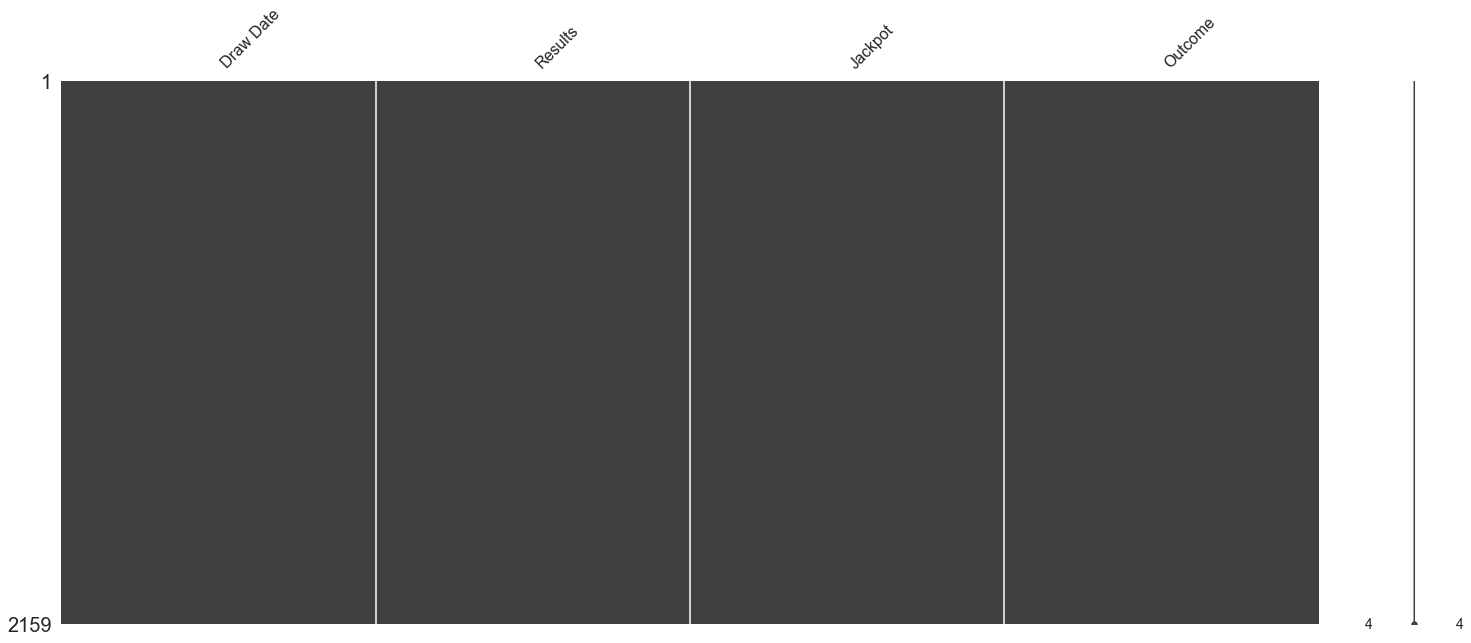

In [36]:
# Checking missing values
missing_values_count = df.isnull().sum()
missingno.matrix(df)

#Percentage missing values
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
(total_missing/total_cells) * 100

In [37]:
# Dropping missing values
df = df.dropna()

In [38]:
# Converting 'Draw Date' to datetime object
df['Draw Date'] = pd.to_datetime(df['Draw Date'])

In [39]:
# Converting 'Results' to np.array
temp = []
for i in df['Results']:
    my_str = np.fromstring(str(i), dtype=int, sep=' ')
    temp.append(my_str)
df['Results'] = temp

In [40]:
# Removing string values from 'Jackpot'
# Converting 'Jackpot' to float
df['Jackpot'] = df['Jackpot'].replace({'R': '', ',': ''}, regex=True).astype(float)

In [41]:
df.tail()

,Draw Date,Results,Jackpot,Outcome
2177,2022-01-15,"[7, 12, 13, 19, 25, 37, 50]",2438240.11,Roll
2178,2022-01-12,"[5, 16, 30, 45, 47, 52, 13]",26368895.60,Won
2179,2022-01-08,"[6, 12, 15, 17, 22, 33, 46]",23809880.56,Roll
2180,2022-01-05,"[8, 14, 15, 25, 30, 31, 17]",21247688.42,Roll
2181,2022-01-01,"[5, 10, 16, 43, 44, 49, 23]",18730287.07,Roll


In [42]:
# Changing the 'Jackpot' values to be represented in millions of Rands
# Rounding number to 2 decimals
df['Jackpot'] = round(df['Jackpot']/1000000,2)
df.head()

,Draw Date,Results,Jackpot,Outcome
0,2000-12-30,"[4, 25, 36, 39, 43, 49, 15]",0.00,Won
1,2000-12-23,"[16, 25, 32, 35, 42, 47, 49]",4.53,Won
3,2000-12-16,"[1, 4, 18, 19, 28, 44, 47]",20.00,Won
4,2000-12-09,"[2, 11, 23, 24, 41, 46, 18]",0.00,Won
5,2000-12-02,"[10, 14, 15, 20, 46, 47, 21]",0.00,Won


In [43]:
# Cleaning dataframe
b1,b2,b3,b4,b5,b6,b7 = [],[],[],[],[],[],[]

for i in df.Results:
    b1.append(i[0])
    b2.append(i[1])
    b3.append(i[2])
    b4.append(i[3])
    b5.append(i[4])
    b6.append(i[5])
    b7.append(i[6])
    
dict = {
    "Ball 1":b1,
    "Ball 2":b2,
    "Ball 3":b3,
    "Ball 4":b4,
    "Ball 5":b5,
    "Ball 6":b6,
    "Ball 7":b7,
    "Jackpot": df['Jackpot'],
    "Outcome":df['Outcome'],
    "Draw Date" : df['Draw Date']
  
}

df = pd.DataFrame(dict)

In [44]:
df.head()

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball 7,Jackpot,Outcome,Draw Date
0,4,25,36,39,43,49,15,0.00,Won,2000-12-30
1,16,25,32,35,42,47,49,4.53,Won,2000-12-23
3,1,4,18,19,28,44,47,20.00,Won,2000-12-16
4,2,11,23,24,41,46,18,0.00,Won,2000-12-09
5,10,14,15,20,46,47,21,0.00,Won,2000-12-02


## EDA of data

In [45]:
# Setting theme
sns.set_theme(context = "notebook",style="darkgrid",palette="deep")

In [46]:
# A quick stats overview
df.describe()

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Ball 6,Ball 7,Jackpot
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,7.155628,14.386753,21.604447,28.870310,36.174618,43.452061,25.244094,9.090551
std,5.832371,7.524383,8.216041,8.475765,7.769894,6.002887,14.323328,12.643961
min,1.000000,2.000000,3.000000,5.000000,8.000000,14.000000,1.000000,0.000000
25%,3.000000,9.000000,16.000000,23.000000,31.000000,40.000000,13.000000,0.000000
50%,6.000000,13.000000,21.000000,29.000000,37.000000,45.000000,25.000000,3.980000
75%,10.000000,19.000000,27.000000,35.000000,42.000000,48.000000,38.000000,13.000000
max,38.000000,41.000000,47.000000,50.000000,51.000000,52.000000,52.000000,110.000000


### Frequency of wins and rolls per year

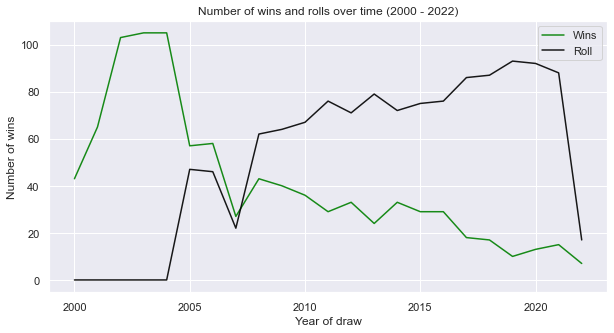

In [47]:
# Preprocessing data
years = pd.DatetimeIndex(df['Draw Date']).year.unique()
wins_per_year = []
rolls_per_year = []

for i in years:
    wins_per_year.append(len(df[(pd.DatetimeIndex(df['Draw Date']).year == i) & (df['Outcome'] == 'Won')]))

for i in years:
    rolls_per_year.append(len(df[(pd.DatetimeIndex(df['Draw Date']).year == i) & (df['Outcome'] == 'Roll')]))
        
# Plotting data
fig, ax = plt.subplots(figsize=(10,5))
fig = sns.lineplot(x=years,y=wins_per_year,color = 'green',alpha=.9)
fig = sns.lineplot(x=years,y=rolls_per_year,color = 'black', alpha=.9)
ax.set_title('Number of wins and rolls over time (2000 - 2022)')
ax.set_xlabel('Year of draw')
ax.set_ylabel('Number of wins')
plt.legend(["Wins","Roll"])
plt.show()


### Has the total winnings increased over time?

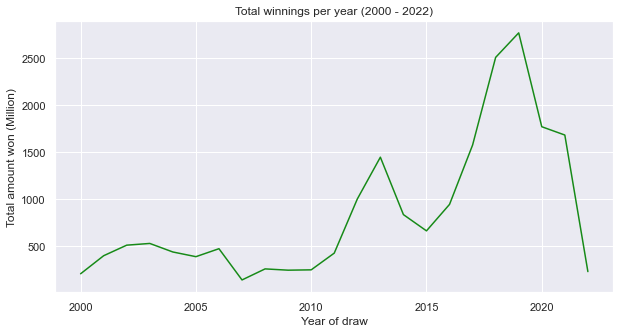

In [58]:
# Processing data
winning_amount = []

for i in years:
   winning_amount.append(df.loc[(pd.DatetimeIndex(df['Draw Date']).year == i),'Jackpot'].sum())

# Plotting data
fig, ax = plt.subplots(figsize=(10,5))
fig = sns.lineplot(x=years,y=winning_amount,color = 'green',alpha=.9)
ax.set_title('Total winnings per year (2000 - 2022)')
ax.set_xlabel('Year of draw')
ax.set_ylabel('Total amount won (Million)')
plt.show()


### Distribution of numbers in relation to each ball

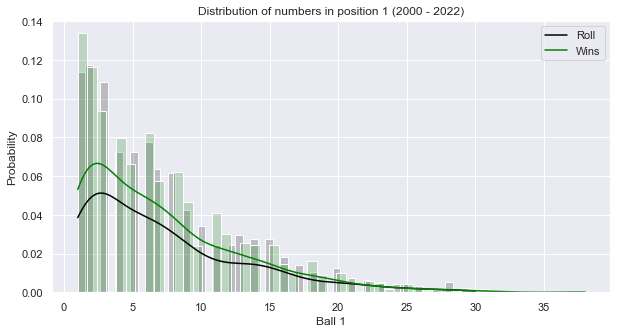

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
fig = sns.histplot(data=df[df['Outcome'] == 'Won'],x="Ball 1",kde=True,stat="probability", bins= 53, color = 'black',alpha=.2)
fig = sns.histplot(data=df[df['Outcome'] == 'Roll'],x="Ball 1",kde=True,stat="probability", bins= 53, color = 'green', alpha=.2)
plt.legend(["Roll","Wins"])
axs.set_title("Distribution of numbers in position 1 (2000 - 2022)")
plt.show()

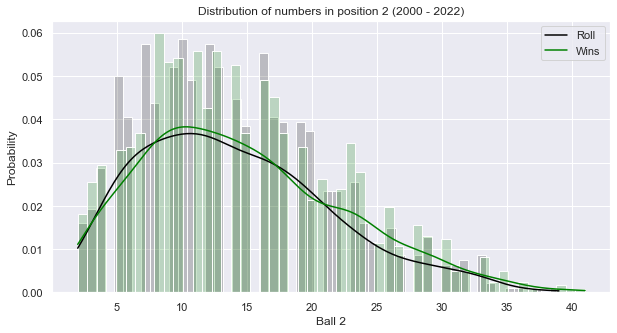

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
fig = sns.histplot(data=df[df['Outcome'] == 'Won'],x="Ball 2",kde=True,stat="probability", bins= 53, color = 'black',alpha=.2)
fig = sns.histplot(data=df[df['Outcome'] == 'Roll'],x="Ball 2",kde=True,stat="probability", bins= 53, color = 'green', alpha=.2)
plt.legend(["Roll","Wins"])
axs.set_title("Distribution of numbers in position 2 (2000 - 2022)")
plt.show()

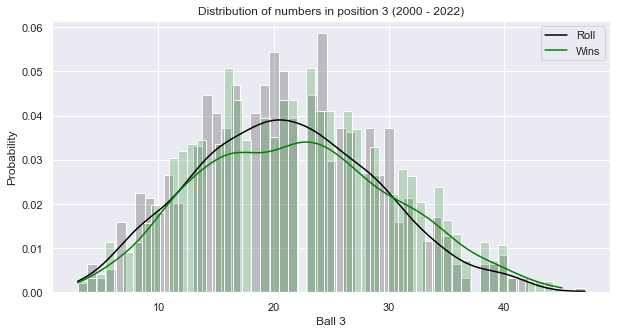

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
fig = sns.histplot(data=df[df['Outcome'] == 'Won'],x="Ball 3",kde=True,stat="probability", bins= 53, color = 'black',alpha=.2)
fig = sns.histplot(data=df[df['Outcome'] == 'Roll'],x="Ball 3",kde=True,stat="probability", bins= 53, color = 'green', alpha=.2)
plt.legend(["Roll","Wins"])
axs.set_title("Distribution of numbers in position 3 (2000 - 2022)")
plt.show()

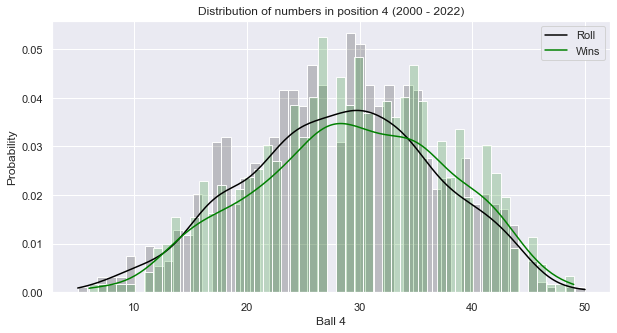

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
fig = sns.histplot(data=df[df['Outcome'] == 'Won'],x="Ball 4",kde=True,stat="probability", bins= 53, color = 'black',alpha=.2)
fig = sns.histplot(data=df[df['Outcome'] == 'Roll'],x="Ball 4",kde=True,stat="probability", bins= 53, color = 'green', alpha=.2)
plt.legend(["Roll","Wins"])
axs.set_title("Distribution of numbers in position 4 (2000 - 2022)")
plt.show()

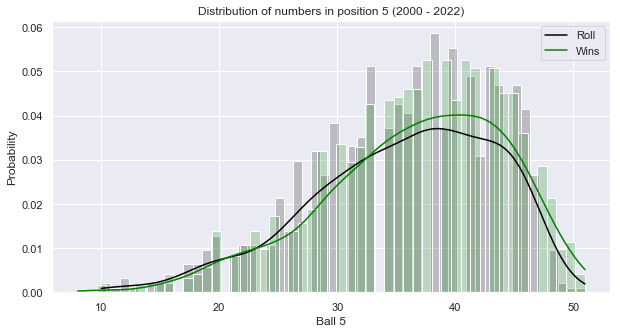

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
fig = sns.histplot(data=df[df['Outcome'] == 'Won'],x="Ball 5",kde=True,stat="probability", bins= 53, color = 'black',alpha=.2)
fig = sns.histplot(data=df[df['Outcome'] == 'Roll'],x="Ball 5",kde=True,stat="probability", bins= 53, color = 'green', alpha=.2)
plt.legend(["Roll","Wins"])
axs.set_title("Distribution of numbers in position 5 (2000 - 2022)")
plt.show()

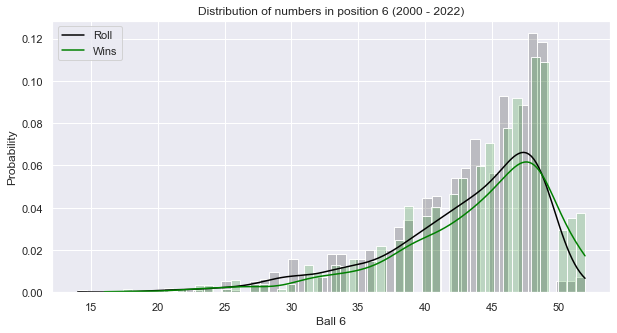

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
fig = sns.histplot(data=df[df['Outcome'] == 'Won'],x="Ball 6",kde=True,stat="probability", bins= 53, color = 'black',alpha=.2)
fig = sns.histplot(data=df[df['Outcome'] == 'Roll'],x="Ball 6",kde=True,stat="probability", bins= 53, color = 'green', alpha=.2)
plt.legend(["Roll","Wins"])
axs.set_title("Distribution of numbers in position 6 (2000 - 2022)")
plt.show()

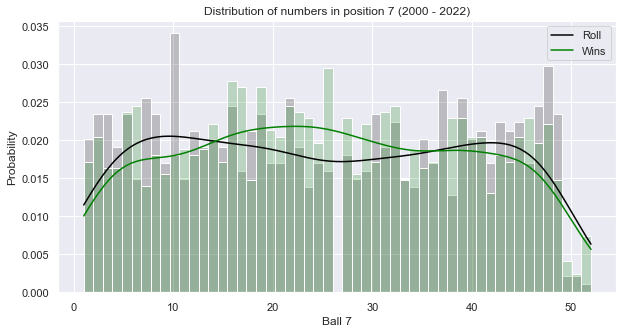

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
fig = sns.histplot(data=df[df['Outcome'] == 'Won'],x="Ball 7",kde=True,stat="probability", bins= 53, color = 'black',alpha=.2)
fig = sns.histplot(data=df[df['Outcome'] == 'Roll'],x="Ball 7",kde=True,stat="probability", bins= 53, color = 'green', alpha=.2)
plt.legend(["Roll","Wins"])
axs.set_title("Distribution of numbers in position 7 (2000 - 2022)")
plt.show()

### Most common numbers regardless of position

In [ ]:
# Preprocessing number
all_numbers = []
number_list =["Ball 1","Ball 2","Ball 3","Ball 4","Ball 5","Ball 6","Ball 7"]
for i in number_list:
    for j in df[i]:
        all_numbers.append(j)
all_numbers = np.array(all_numbers)

# Calculating the most common values
common_vals = np.unique(all_numbers)
count_vals = np.unique(all_numbers,return_counts=True)[1]

#Setting up data as dataframe
count_df = pd.DataFrame(data = count_vals, columns = ["Count"])

# Selecting the 7 most and least common numbers
seven_most_num = count_df.sort_values(by='Count', ascending=False)[0:7]
seven_least_num = count_df.sort_values(by='Count', ascending=False)[-7:]

# Printing numbers
print(f"The seven most commonly drawn numbers are: {np.array(seven_most_num.index)}")
print(f"The seven least commonly drawn numbers are: {np.array(seven_least_num.index)}")

The seven most commonly drawn numbers are: [15 47  1  7 22 29 13]
The seven least commonly drawn numbers are: [ 3 24 36 35 49 51 50]


## Conclusion (Last updated 29/03/22)

1. The number of times that the jackpot is won per year is decreasing.

2. The total payout per year is increasing.

3. The numbers that are drawn depends on the position that they are drawn in:
    * Position 1: This number tends to be between 1 and 5 with the exception of 3. Probability = +-5%
    * Position 2: This number tends to be between 8 and 15. Probability = +-5%
    * Position 3: This number tends to be between 15 and 25. Probability = +-4%
    * Position 4: This number tends to be between 25 and 33. Probability = +-4%
    * Position 5: This number tends to be between 37 and 42. Probability = +-4%
    * Position 6: This number tends to be  between 45 and 48. Probability = +-6%
    * Position 7: This number is relatively evenly distributed between 5 and 45. Probability = +-2%


4. The most common numbers are: 15 47  1  7 22 29 13

5. The least common numbers are: 3 24 36 35 49 51 50
